In [18]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc 
import pywikibot

import utils
import coeurimages_preprocessing as cpro
import lumieres_api as lum
import lumieres_matching as lumatch



# Lumieres matching

In [2]:
# filesliced=files[files['refyear']>2012 ]
filesliced=pd.read_excel("matched/matched_project_2007_2024.xlsx")
min_year=filesliced["refyear"].min()
max_year=filesliced["refyear"].max()

In [3]:
filesliced[filesliced["lumieres_id"]>0][filesliced["lumieres_relevance"]<0.7][['Reference','lumieres_relevance','Director','lumieres_directors','lumieres_matching_title','lumieres_title',
        'OriginalTitle','FrenchTitle','EnglishTitle','support','SecretariatDecision','lumieres_prod_year',"refyear"]]

,Reference,lumieres_relevance,Director,lumieres_directors,lumieres_matching_title,lumieres_title,OriginalTitle,FrenchTitle,EnglishTitle,support,SecretariatDecision,lumieres_prod_year,refyear
1277,13-132-F,0.69,['Bakur Bakuradze'],"Sophie Metrich, Julien Milanesi",L'intérêt général & moi,L'intérêt général & moi,General,Le general,General,Inelegible,Withdrawal Secretariat,2016,2013
1478,15-002-F,0.64,['Nicolae Caranfil'],Nae Caranfil,6.9 pe scara Richter,6.9 pe scara Richter,"6,9 on the Richter Scale (6,9 pe scara Richter)","6,9 sur L'Echelle de Richter","6,9 on the Richter Scale",Supported,Eligible,2016,2015
2301,18-216-F,0.62,['Alexis Alexiou'],Dome Karukoski,Middle Earth,Tolkien,Middle Earth (Mesogia),La Terre Du Milieu,Middle Earth,Rejected,Eligible,2019,2018
2848,21-056-F,0.63,['Bachir Bensaddek'],Arnaud Desplechin,Frère et soeur,Frère et soeur,Le Frère,Le Frère,A Brother,Rejected,Eligible,2022,2021
2934,21-141-F,0.63,['Oskar Axelsson'],Óskar Thór Axelsson,Operation Napoleon,Operation Napoleon,Operation Napoleon (Napóleonsskjölin),L´Opération Napoléon,Operation Napoleon,Rejected,Eligible,2023,2021
2993,21-200-F,0.57,['Melisa Fatma Önel Tecimen'],Melisa Önel,Suddenly,Suddenly,Suddenly (Aniden),Soudain,Suddenly,Supported,Eligible,2022,2021
3154,22-105-F,0.69,['Joachim Lafosse'],Ilija Pavlov,Rebirth: Voice of Silence,Rebirth: Voice of Silence,Un silence,Un silence,A Silence,Rejected,Eligible,2022,2022
3371,23-092-F,0.63,['Ásthildur Kjartansdóttir'],Mika'Ela Fisher,Pure Air of the Mountain: For All and None,Die Höhenluft - für Alle und Keinen,The Mountain (Fjallið),La Montagne,The Mountain,Rejected,Eligible,2023,2023
3387,23-107-F,0.57,['Klemen Dvornik'],Todor Matsanov,Block,Block,Block 5 (Blok 5),Immeuble 5,Block 5,Supported,Eligible,2023,2023
3443,23-163-F,0.61,['Türker Süer'],Tomás Masín,Brothers,Bratri,Brothers (Brüder),Brothers,Brothers,Supported,Eligible,2023,2023


In [4]:
print("number of files :",len(filesliced))
print("match founds : ", len(filesliced[filesliced["lumieres_id"]>0]))
print("no match founds : ", len(filesliced[filesliced["lumieres_id"]<0]))
print("% found : ", len(filesliced[filesliced["lumieres_id"]>0])/(len(filesliced[filesliced["lumieres_id"]<0])+len(filesliced[filesliced["lumieres_id"]>0]))*100)
print("SUPPORTED | match founds : ", len(filesliced[filesliced["lumieres_id"]>0][filesliced["support"]=='Supported']))
print("SUPPORTED | no match founds : ", len(filesliced[filesliced["lumieres_id"]<0][filesliced["support"]=='Supported']))
print("SUPPORTED | % found : ", len(filesliced[filesliced["lumieres_id"]>0][filesliced["support"]=='Supported'])/(len(filesliced[filesliced["lumieres_id"]<0][filesliced["support"]=='Supported'])+len(filesliced[filesliced["lumieres_id"]>0][filesliced["support"]=='Supported']))*100)

number of files : 3796
match founds :  2901
no match founds :  895
% found :  76.42255005268704
SUPPORTED | match founds :  1049
SUPPORTED | no match founds :  206
SUPPORTED | % found :  83.58565737051794


In [5]:
perc_match_years=[len(filesliced[filesliced["lumieres_id"]>0][filesliced['refyear']==y])/(len(filesliced[filesliced["lumieres_id"]<0][filesliced['refyear']==y])+len(filesliced[filesliced["lumieres_id"]>0][filesliced['refyear']==y]))*100 for y in range(min_year,max_year+1)]


supp_filesliced=filesliced[filesliced["support"]=='Supported']
supp_perc_match_years=[len(supp_filesliced[supp_filesliced["lumieres_id"]>0][supp_filesliced['refyear']==y])/(len(supp_filesliced[supp_filesliced["lumieres_id"]<0][supp_filesliced['refyear']==y])+len(supp_filesliced[supp_filesliced["lumieres_id"]>0][supp_filesliced['refyear']==y]))*100 for y in range(min_year,max_year+1)]


[]

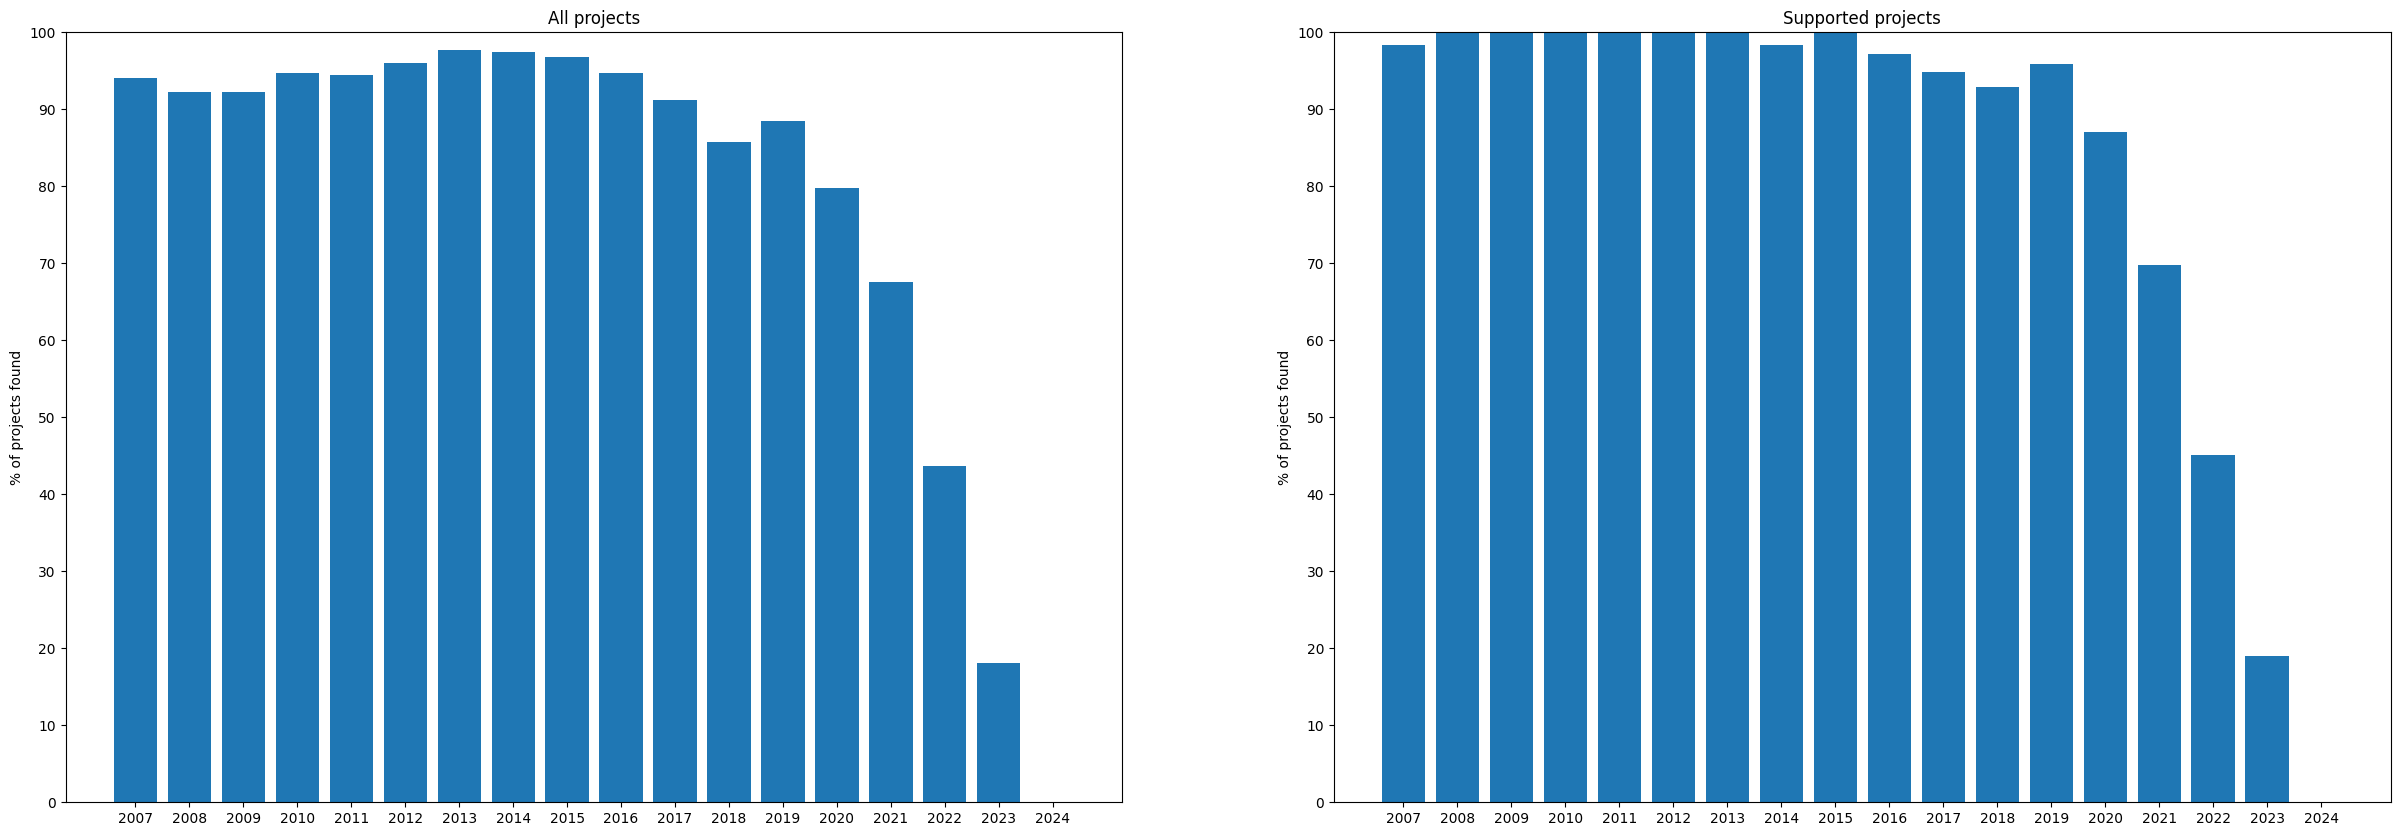

In [6]:

fig,axs=plt.subplots(1,2,figsize=(30,10))
axs[0].bar(range(min_year,max_year+1),perc_match_years)
axs[1].bar(range(min_year,max_year+1),supp_perc_match_years)
axs[0].set_title('All projects')
axs[1].set_title('Supported projects')

axs[0].set_ylabel("% of projects found")
axs[1].set_ylabel('% of projects found')

axs[0].set_ylim([0,100])
axs[1].set_ylim([0,100])

axs[0].set_yticks([x*10 for x in range(11)])
axs[1].set_yticks([x*10 for x in range(11)])
axs[0].set_xticks(range(min_year,max_year+1))
axs[1].set_xticks(range(min_year,max_year+1))

plt.plot()

In [7]:
nb_admi=[filesliced[filesliced["lumieres_id"]>0][filesliced['refyear']==y]["lumieres_admissions"].sum() for y in range(min_year,max_year+1)]
nb_admi_par_proj=[filesliced[filesliced["lumieres_id"]>0][filesliced['refyear']==y]["lumieres_admissions"].sum()/len(filesliced[filesliced["lumieres_id"]>0][filesliced['refyear']==y]) for y in range(min_year,max_year+1)]

supp_filesliced=filesliced[filesliced["support"]=='Supported']
supp_nb_admi=[supp_filesliced[supp_filesliced["lumieres_id"]>0][supp_filesliced['refyear']==y]["lumieres_admissions"].sum() for y in range(min_year,max_year+1)]
supp_nb_admi_par_proj=[supp_filesliced[supp_filesliced["lumieres_id"]>0][supp_filesliced['refyear']==y]["lumieres_admissions"].sum()/len(supp_filesliced[supp_filesliced["lumieres_id"]>0][supp_filesliced['refyear']==y]) for y in range(min_year,max_year+1)]

rej_filesliced=filesliced[filesliced["support"]=='Rejected']
rej_nb_admi=[rej_filesliced[rej_filesliced["lumieres_id"]>0][rej_filesliced['refyear']==y]["lumieres_admissions"].sum() for y in range(min_year,max_year+1)]
rej_nb_admi_par_proj=[rej_filesliced[rej_filesliced["lumieres_id"]>0][rej_filesliced['refyear']==y]["lumieres_admissions"].sum()/len(rej_filesliced[rej_filesliced["lumieres_id"]>0][rej_filesliced['refyear']==y]) for y in range(min_year,max_year+1)]


nb projets : 2901
SUPPORTED | nb projets : 1049
REJECTED | nb projets : 1232
total admissions : 541.436455 M
SUPPORTED | total admissions : 225.412362 M
REJECTED | total admissions : 213.407272 M
admissions moyennes : 182913.79882584442
SUPPORTED | admissions moyennes : 214639.24686524156
REJECTED | admissions moyennes : 183903.11944964423


[]

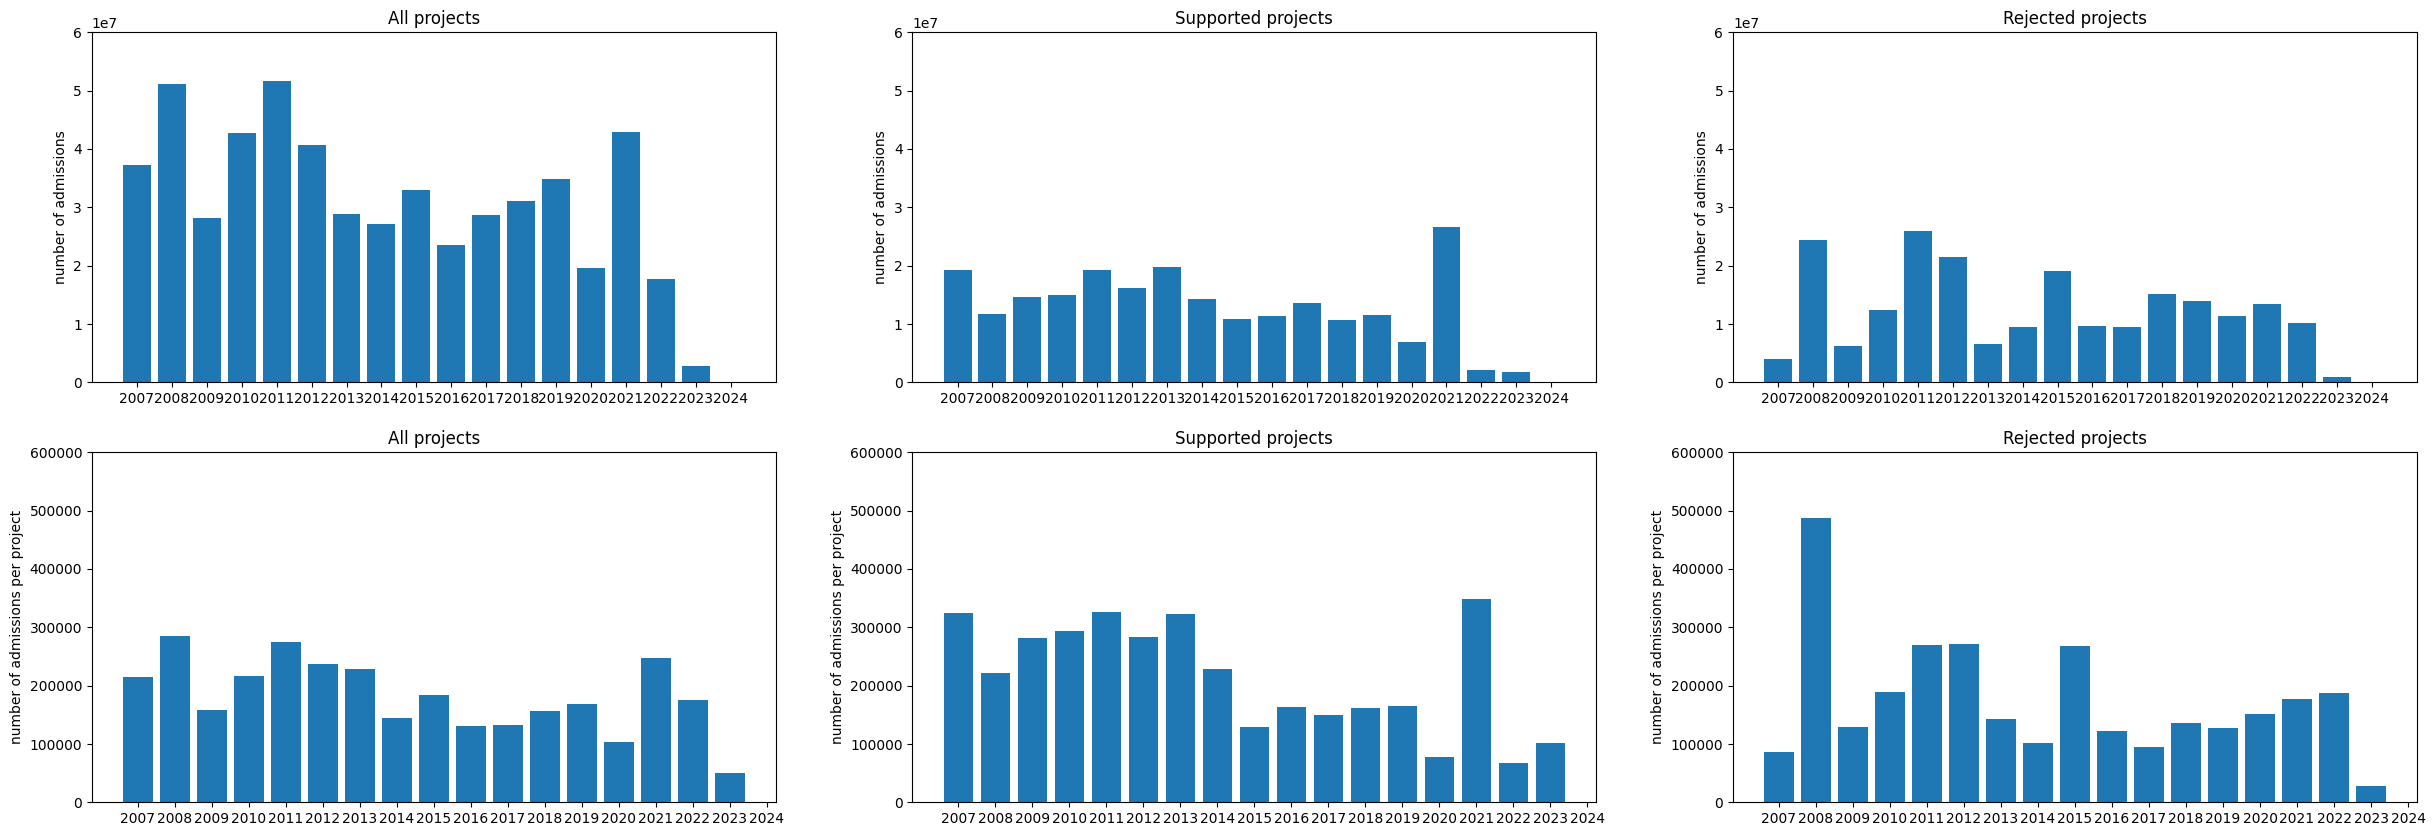

In [8]:

print("nb projets :",len(filesliced[filesliced["lumieres_id"]>0]))
print("SUPPORTED | nb projets :",len(filesliced[filesliced["lumieres_id"]>0][filesliced["support"]=='Supported']))
print("REJECTED | nb projets :",len(filesliced[filesliced["lumieres_id"]>0][filesliced["support"]=='Rejected']))


print("total admissions :",sum(nb_admi)/1000000,"M")
print("SUPPORTED | total admissions :",sum(supp_nb_admi)/1000000,"M")
print("REJECTED | total admissions :",sum(rej_nb_admi)/1000000,"M")

print("admissions moyennes :",np.mean(nb_admi_par_proj[:-1]))
print("SUPPORTED | admissions moyennes :",np.mean(supp_nb_admi_par_proj[:-1]))
print("REJECTED | admissions moyennes :",np.mean(rej_nb_admi_par_proj[:-2]))

plt.close()
fig,axs=plt.subplots(2,3,figsize=(30,10))
axs[0][0].bar(range(min_year,max_year+1),nb_admi)
axs[0][1].bar(range(min_year,max_year+1),supp_nb_admi)
axs[0][2].bar(range(min_year,max_year+1),rej_nb_admi)
axs[1][0].bar(range(min_year,max_year+1),nb_admi_par_proj)
axs[1][1].bar(range(min_year,max_year+1),supp_nb_admi_par_proj)
axs[1][2].bar(range(min_year,max_year+1),rej_nb_admi_par_proj)


axs[0][0].set_title('All projects')
axs[0][1].set_title('Supported projects')
axs[0][2].set_title('Rejected projects')
axs[0][0].set_ylabel("number of admissions")
axs[0][1].set_ylabel('number of admissions')
axs[0][2].set_ylabel('number of admissions')


axs[1][0].set_title('All projects')
axs[1][1].set_title('Supported projects')
axs[1][2].set_title('Rejected projects')
axs[1][0].set_ylabel("number of admissions per project")
axs[1][1].set_ylabel('number of admissions per project')
axs[1][2].set_ylabel('number of admissions per project')

big_y=60000000
small_y=600000
axs[0][0].set_ylim([0,big_y])
axs[0][1].set_ylim([0,big_y])
axs[0][2].set_ylim([0,big_y])
axs[1][0].set_ylim([0,small_y])
axs[1][1].set_ylim([0,small_y])
axs[1][2].set_ylim([0,small_y])


axs[0][0].set_xticks(range(min_year,max_year+1))
axs[0][1].set_xticks(range(min_year,max_year+1))
axs[0][2].set_xticks(range(min_year,max_year+1))
axs[1][0].set_xticks(range(min_year,max_year+1))
axs[1][1].set_xticks(range(min_year,max_year+1))
axs[1][2].set_xticks(range(min_year,max_year+1))

plt.plot()

In [9]:
filesliced.columns

Index(['ID', 'Reference', 'refyear', 'OriginalTitle', 'FrenchTitle',
       'EnglishTitle', 'CommitteDecisionDate', 'kind', 'Genre', 'support',
       'SecretariatDecision', 'firstfilm', 'secondfilm', 'budget', 'reason',
       'Director', 'key', 'AnnouncedAmount', 'CoproducerId', 'country1',
       'countryname1_english', 'percentage_participation', 'contributor_rank',
       'majmin', 'lumieres_id', 'lumieres_title', 'lumieres_matching_title',
       'lumieres_directors', 'lumieres_prod_year', 'lumieres_relevance',
       'lumieres_admissions', 'imdb_id'],
      dtype='object')

In [10]:
filesliced.nlargest(10,columns=["lumieres_admissions"])[['Reference','OriginalTitle','support',
       'SecretariatDecision','lumieres_admissions','Director', 'budget','kind', 'Genre','lumieres_matching_title','lumieres_title',
       'lumieres_directors', 'lumieres_prod_year','lumieres_id']]

,Reference,OriginalTitle,support,SecretariatDecision,lumieres_admissions,Director,budget,kind,Genre,lumieres_matching_title,lumieres_title,lumieres_directors,lumieres_prod_year,lumieres_id
3042,21-250-F,Arcadia,Supported,Eligible,18654035,['Yorgos Zois'],1087756.0,Fiction,Drama,Arcadia,Jurassic World: Dominion,Colin Trevorrow,2022,293514
2407,19-085-F,Light falls,Inelegible,Withdrawal Secretariat,8006845,"['Phedon Papamichael', 'Sven Dagones']",605531.0,Fiction,Thriller,La cuțite,Knives Out,Rian Johnson,2019,82855
228,08-045-F,Le Petit Nicolas,Rejected,Eligible,7488502,['Laurent Tirard'],22713636.0,Fiction,NaN,Le petit Nicolas,Le petit Nicolas,Laurent Tirard,2009,31717
70,07-071-F,Le Chanteur,Inelegible,Withdrawal Producer,6705168,['Kassem Hawal'],1365304.0,Fiction,NaN,Untitled Bryan Singer Thriller,Valkyrie,Bryan Singer,2008,30414
257,08-074-F,La Prima Notte Della Luna,Rejected,Eligible,4676997,['Massimo Guglielmi'],2000000.0,Fiction,NaN,La prima notte del giudizio,The First Purge,Gerard McMurray,2018,77640
2201,18-112-F,The Emigrants (Utvandrarna),Rejected,Eligible,4587197,['Daniel Espinosa'],8689121.0,Fiction,Drama,Morbius,Morbius,Daniel Espinosa,2022,261728
3108,22-059-F,Madame Luna,Rejected,Eligible,4587197,['Daniel Espinosa'],5276736.0,Fiction,Drama,Morbius,Morbius,Daniel Espinosa,2022,261728
702,10-134-F,The Three Musketeers,Inelegible,Ineligible,4583858,['Paul W. S Anderson'],58477176.0,Fiction,NaN,Les Trois Mousquetaires,The Three Musketeers,Paul W.S. Anderson,2011,37320
1570,15-096-F,The Child and the White Lion,Rejected,Eligible,4568349,['Gilles De Maistre'],8682501.0,Fiction,Children/Family,Mia et le lion blanc,Mia et le lion blanc,Gilles de Maistre,2018,79804
2086,17-237-F,Epic,Inelegible,Withdrawal Secretariat,3839094,"['Juraj Chlpik', 'Jozef Vlk']",693522.0,Fiction,Drama,Captain Underpants: The First Epic Movie,Captain Underpants: The First Epic Movie,David Soren,2017,72575


# external ids exploration

In [11]:
data=pd.read_excel("matched/matched_projects.xlsx")
data_found=data.loc[data['lumieres_id']>0,:]
print(len(data),len(data_found))

2628 1274


In [12]:

data_found["external_ids"]=data_found["lumieres_id"].apply(lum.get_external_ids)

In [16]:
data_found

,ID,Reference,refyear,OriginalTitle,FrenchTitle,EnglishTitle,CommitteDecisionDate,kind,Genre,support,...,majmin,lumieres_id,lumieres_title,lumieres_matching_title,lumieres_directors,lumieres_prod_year,lumieres_relevance,lumieres_admissions,imdb_id,external_ids
0,6924,13-001-F,2013,No Mercy (Senza nessuna pietà),NaN,No Mercy,2013-03-14,Fiction,NaN,Rejected,...,"['Minority', 'Majority']",49465,Senza nessuna pietà,Senza nessuna pietà,Michele Alhaique,2014,0.95,34169,tt3890914,[{'url': 'https://www.imdb.com/title/tt3890914...
1,6925,13-002-F,2013,Winter Sleep,Sommeil d’hiver,NaN,2013-03-14,Fiction,NaN,Supported,...,"['Minority', 'Minority', 'Minority']",47232,Kis Uykusu,Winter Sleep (Sueño de invierno),Nuri Bilge Ceylan,2014,0.95,913778,tt2758880,[{'url': 'https://www.imdb.com/title/tt2758880...
2,6927,13-004-C,2013,All my Children,NaN,NaN,2013-03-14,Documentary,NaN,Supported,...,"['Majority', 'Minority']",49698,Vsetky moje deti,All My Children,Ladislav Kabos,2013,1.00,31138,tt3289512,[{'url': 'https://www.imdb.com/title/tt3289512...
3,6928,13-005-F,2013,La Marche,NaN,NaN,2013-03-14,Fiction,NaN,Rejected,...,"['Minority', 'Majority']",43310,La marche,La marche,Nabil Ben Yadir,2013,1.00,201421,tt2832422,[{'url': 'https://www.imdb.com/title/tt2832422...
5,6930,13-007-C,2013,Libres de courir,NaN,Free to Run,2013-03-14,Documentary,NaN,Rejected,...,"['Majority', 'Minority']",68154,Free to Run,Free to Run,Pierre Morath,2016,1.00,45770,tt3530882,[{'url': 'https://www.imdb.com/title/tt3530882...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,9120,22-153-F,2022,The Beautiful Summer,Le bel été,The beautiful summer,2022-06-20,Fiction,Drama,Rejected,...,"['Majority', 'Minority']",452267,La bella estate,The Beautiful Summer,Laura Luchetti,2023,1.00,41952,tt9320170,[{'url': 'https://www.imdb.com/title/tt9320170...
2039,9122,22-155-F,2022,Simple comme Sylvain,Simple comme Sylvain,Simply Sylvain,2022-06-20,Fiction,Comedy,Rejected,...,"['Minority', 'Majority']",441490,Simple comme Sylvain,Simple comme Sylvain,Monia Chokri,2023,1.00,267927,tt22487338,[{'url': 'https://www.imdb.com/title/tt2248733...
2040,9123,22-156-F,2022,Vincent doit mourir,NaN,Vincent must die,2022-06-20,Fiction,Action/Fantasy/Genre,Supported,...,"['Minority', 'Minority']",441646,Vincent doit mourir,Vincent must die,Stéphan Castang,2023,1.00,51644,tt23790924,[{'url': 'https://www.imdb.com/title/tt2379092...
2044,9127,22-160-F (U),2022,Sultana's Dream (El sueño de la Sultana),Le Rêve De Sultane,Sultana's Dream,2022-11-28,Animation,Drama,Rejected,...,"['Majority', 'Minority']",441564,El sueño de la sultana,El sueño de la sultana,Isabel Herguera,2023,0.95,1307,tt28298233,[{'url': 'https://www.imdb.com/title/tt2829823...


In [14]:
ext_ids_dict=dict()

for link_list in data_found["external_ids"].to_list():
    for link in link_list:
        if link["name"] in ext_ids_dict.keys():
            ext_ids_dict[link["name"]]+=1
        else:
            ext_ids_dict[link["name"]]=1

In [15]:
{k: v for k, v in sorted(ext_ids_dict.items(), key=lambda item: item[1],reverse=True)}

{'IMDb ID': 1271,
 'Justwatch Id': 1198,
 'Metaprofile': 991,
 'Wikidata': 889,
 'ISAN': 762,
 'EIDR': 741,
 'MEDIA': 568,
 'CNC (FR)': 539,
 'Comscore ID': 522,
 'JustWatch title url': 476,
 'FFA (DE)': 409,
 'ICAA (ES)': 368,
 'Cinetel (IT)': 333,
 'UFD (CZ)': 249,
 'MEDIA old/legacy': 242,
 'MIC (IT)': 188,
 'DFI (DK)': 161,
 'ECFA': 145,
 'Nemzeti Filmiroda': 131,
 'Distr. (HU)': 106,
 'SFI (SE)': 88,
 'OFS (CH)': 87,
 'UK Film Council / Nielsen EDI (GB)': 71,
 'CFWB (BE)': 54,
 'The Movie Database (TMDB)': 7,
 'AlloCiné': 6,
 'ProCinema (CH)': 1,
 'FilmAffinity': 1,
 'Cineuropa': 1,
 'Unifrance (FR)': 1}

# Wikidata

In [19]:
site = pywikibot.Site("wikidata", "wikidata")
repo = site.data_repository()
item = pywikibot.ItemPage(repo, "Q117037697")  # Replace with the desired item ID  #Q122226197
item_dict = item.get()
clm_dict = item_dict["claims"]

print("Awards :")
clm_list = clm_dict["P166"]  # P166 is the property ID for 'award received'
for clm in clm_list:
    clm_trgt = clm.getTarget()
    print(clm_trgt.labels['en'])  # Print the award name in English

print("Nominations :")
clm_list = clm_dict["P1411"]  
for clm in clm_list:
    clm_trgt = clm.getTarget()
    print(clm_trgt.labels['en'])  # Print the award name in English


Awards :
Palme d'Or
European Film Award for Best Film
European University Film Award
Golden Globe Award for Best English-Language Foreign Film
César Award for Best Film
Nominations :
European Film Award for Best Film
Academy Award for Best Picture
Academy Award for Best Director
Academy Award for Best Actress
Academy Award for Best Writing, Original Screenplay
Academy Award for Best Film Editing


# IMDb ratings

In [22]:
ratings=pd.read_csv("data/title.ratings.tsv",sep='\t')
ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,2058
1,tt0000002,5.6,277
2,tt0000003,6.5,2026
3,tt0000004,5.4,179
4,tt0000005,6.2,2792
...,...,...,...
1449581,tt9916730,7.0,12
1449582,tt9916766,7.1,23
1449583,tt9916778,7.2,36
1449584,tt9916840,7.2,10


In [23]:
data=pd.read_excel("matched/matched_project_2007_2024.xlsx")
data_found=data.loc[data['lumieres_id']>0,:]
min_year=data_found["refyear"].min()
max_year=data_found["refyear"].max()
data_found

,ID,Reference,refyear,OriginalTitle,FrenchTitle,EnglishTitle,CommitteDecisionDate,kind,Genre,support,...,contributor_rank,majmin,lumieres_id,lumieres_title,lumieres_matching_title,lumieres_directors,lumieres_prod_year,lumieres_relevance,lumieres_admissions,imdb_id
0,519,07-001-F,2007,Kraj Igre,NaN,Game Over,2007-02-27,Fiction,NaN,Inelegible,...,"[1, 2]","['Majority', 'Minority']",72329,Game Over,Game Over,Alba Sotorra,2015,1.00,151,tt3113384
1,520,07-002-F,2007,Zena bez tijela,Nije Krai,"Will not stop there a.k.a. ""The Woman without ...",2007-02-27,Fiction,NaN,Supported,...,"[1, 4]","['Majority', 'Minority']",31542,Nije kraj,Nije kraj,Vinko Bresan,2008,0.95,6374,tt0991351
2,521,07-003-F,2007,Suç,NaN,Profane Melody,2007-02-27,Fiction,NaN,Rejected,...,"[1, 2]","['Majority', 'Minority']",33307,Yengeç oyunu,Yengeç oyunu,Ali Özgentürk,2009,1.00,11286,tt1399231
3,522,07-004-F,2007,33 sceny z zycia,NaN,33 Scenes from Live,2007-02-27,Fiction,NaN,Rejected,...,"[1, 2]","['Majority', 'Minority']",31014,33 sceny z zycia,33 sceny z zycia,Malgorzata Szumowska,2008,1.00,207005,tt1263736
4,523,07-005-F,2007,The Time that remains,le temps qu'il reste,NaN,2007-02-27,Fiction,NaN,Supported,...,"[3, 5, 2, 1]","['Minority', 'Minority', 'Minority', 'Majority']",31732,The Time That Remains,The Time That Remains,Elia Suleiman,2009,1.00,238935,tt1037163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3563,9490,23-283-F,2023,A Winner is Seen at the Start (Papillon),Papillon,A Winner is Seen at the Start,2023-11-20,Fiction,Drama,Rejected,...,"[1, 2]","['Majority', 'Minority']",441757,Bên trong vo kén vàng,L'arbre aux papillons d'or,Thien An Pham,2023,0.84,54599,tt10399622
3567,9494,23-287-C,2023,The Sleeper (El Durmiente),NaN,The Sleeper,NaT,Documentary,Drama,Inelegible,...,"[2, 1]","['Minority', 'Majority']",441572,La vida de Brianeitor,La vida de Brianeitor,Álvaro Longoria,2023,1.00,919,tt28750461
3572,9499,23-292-F,2023,Butterfly,Butterfly,Butterfly,2023-11-20,Fiction,Drama,Supported,...,"[5, 1, 8, 4]","['Minority', 'Majority', 'Minority', 'Minority']",441346,Butterfly Tale,Butterfly Tale,Sophie Roy,2023,0.95,9857,tt8434394
3576,9503,23-296-F,2023,The Great Ambition (La grande ambizione),La grande ambition,The Great Ambition,2023-11-20,Fiction,Drama,Rejected,...,"[2, 1, 3]","['Minority', 'Majority', 'Minority']",457244,Trieste è bella di notte,Trieste è bella di notte,"Matteo Calore, Stefano Collizzolli, Andrea Segre",2023,1.00,14887,tt26349734


In [30]:
print(ratings[ratings["tconst"]=="tt9916766"])
ratings[ratings["tconst"]=="tt9916766"].averageRating.values[0]

            tconst  averageRating  numVotes
1449582  tt9916766            7.1        23


7.1

In [31]:
data_found_full=data_found.dropna(subset=["imdb_id"])
data_found_full

,ID,Reference,refyear,OriginalTitle,FrenchTitle,EnglishTitle,CommitteDecisionDate,kind,Genre,support,...,contributor_rank,majmin,lumieres_id,lumieres_title,lumieres_matching_title,lumieres_directors,lumieres_prod_year,lumieres_relevance,lumieres_admissions,imdb_id
0,519,07-001-F,2007,Kraj Igre,NaN,Game Over,2007-02-27,Fiction,NaN,Inelegible,...,"[1, 2]","['Majority', 'Minority']",72329,Game Over,Game Over,Alba Sotorra,2015,1.00,151,tt3113384
1,520,07-002-F,2007,Zena bez tijela,Nije Krai,"Will not stop there a.k.a. ""The Woman without ...",2007-02-27,Fiction,NaN,Supported,...,"[1, 4]","['Majority', 'Minority']",31542,Nije kraj,Nije kraj,Vinko Bresan,2008,0.95,6374,tt0991351
2,521,07-003-F,2007,Suç,NaN,Profane Melody,2007-02-27,Fiction,NaN,Rejected,...,"[1, 2]","['Majority', 'Minority']",33307,Yengeç oyunu,Yengeç oyunu,Ali Özgentürk,2009,1.00,11286,tt1399231
3,522,07-004-F,2007,33 sceny z zycia,NaN,33 Scenes from Live,2007-02-27,Fiction,NaN,Rejected,...,"[1, 2]","['Majority', 'Minority']",31014,33 sceny z zycia,33 sceny z zycia,Malgorzata Szumowska,2008,1.00,207005,tt1263736
4,523,07-005-F,2007,The Time that remains,le temps qu'il reste,NaN,2007-02-27,Fiction,NaN,Supported,...,"[3, 5, 2, 1]","['Minority', 'Minority', 'Minority', 'Majority']",31732,The Time That Remains,The Time That Remains,Elia Suleiman,2009,1.00,238935,tt1037163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3563,9490,23-283-F,2023,A Winner is Seen at the Start (Papillon),Papillon,A Winner is Seen at the Start,2023-11-20,Fiction,Drama,Rejected,...,"[1, 2]","['Majority', 'Minority']",441757,Bên trong vo kén vàng,L'arbre aux papillons d'or,Thien An Pham,2023,0.84,54599,tt10399622
3567,9494,23-287-C,2023,The Sleeper (El Durmiente),NaN,The Sleeper,NaT,Documentary,Drama,Inelegible,...,"[2, 1]","['Minority', 'Majority']",441572,La vida de Brianeitor,La vida de Brianeitor,Álvaro Longoria,2023,1.00,919,tt28750461
3572,9499,23-292-F,2023,Butterfly,Butterfly,Butterfly,2023-11-20,Fiction,Drama,Supported,...,"[5, 1, 8, 4]","['Minority', 'Majority', 'Minority', 'Minority']",441346,Butterfly Tale,Butterfly Tale,Sophie Roy,2023,0.95,9857,tt8434394
3576,9503,23-296-F,2023,The Great Ambition (La grande ambizione),La grande ambition,The Great Ambition,2023-11-20,Fiction,Drama,Rejected,...,"[2, 1, 3]","['Minority', 'Majority', 'Minority']",457244,Trieste è bella di notte,Trieste è bella di notte,"Matteo Calore, Stefano Collizzolli, Andrea Segre",2023,1.00,14887,tt26349734


In [33]:
def imdb_id_to_ratings(id):
    try : 
        return ratings[ratings["tconst"]==id].averageRating.values[0]
    except:
        print("not found : ",id)
        return -1


In [35]:
data_found_full["imdb_ratings"]=data_found_full["imdb_id"].apply(lambda x : imdb_id_to_ratings(x))

not found :  tt5316214
not found :  tt15214972
not found :  tt14195662
not found :  tt14195662
not found :  tt16257546
not found :  tt4379596
not found :  tt10214546
not found :  tt4379596
not found :  tt5768836
not found :  tt13570248
not found :  tt13652648
not found :  tt10153630
not found :  tt8135232
not found :  tt8520458
not found :  tt7043240
not found :  tt13652648
not found :  tt8520458
not found :  tt19633412
not found :  tt10861740
not found :  tt19633412
not found :  tt27120978
not found :  tt10715108
not found :  tt15850340
not found :  tt10515216
not found :  tt20879562
not found :  tt21248154
not found :  tt16311410
not found :  tt12985938
not found :  tt12117514
not found :  tt16305150
not found :  tt29580541
not found :  tt23726942
not found :  tt22863626
not found :  tt28308707
not found :  tt30413125
not found :  tt31136464
not found :  tt26548667
not found :  tt4475036
not found :  tt30458941
not found :  tt31136464
not found :  tt28444169
not found :  tt27533886


In [36]:
def imdb_id_to_nbvotes(id):
    try : 
        return ratings[ratings["tconst"]==id].numVotes.values[0]
    except:
        print("not found : ",id)
        return -1


In [37]:
data_found_full["imdb_nbvotes"]=data_found_full["imdb_id"].apply(lambda x : imdb_id_to_nbvotes(x))

not found :  tt5316214
not found :  tt15214972
not found :  tt14195662
not found :  tt14195662
not found :  tt16257546
not found :  tt4379596
not found :  tt10214546
not found :  tt4379596
not found :  tt5768836
not found :  tt13570248
not found :  tt13652648
not found :  tt10153630
not found :  tt8135232
not found :  tt8520458
not found :  tt7043240
not found :  tt13652648
not found :  tt8520458
not found :  tt19633412
not found :  tt10861740
not found :  tt19633412
not found :  tt27120978
not found :  tt10715108
not found :  tt15850340
not found :  tt10515216
not found :  tt20879562
not found :  tt21248154
not found :  tt16311410
not found :  tt12985938
not found :  tt12117514
not found :  tt16305150
not found :  tt29580541
not found :  tt23726942
not found :  tt22863626
not found :  tt28308707
not found :  tt30413125
not found :  tt31136464
not found :  tt26548667
not found :  tt4475036
not found :  tt30458941
not found :  tt31136464
not found :  tt28444169
not found :  tt27533886


In [38]:
data_found_full

,ID,Reference,refyear,OriginalTitle,FrenchTitle,EnglishTitle,CommitteDecisionDate,kind,Genre,support,...,lumieres_id,lumieres_title,lumieres_matching_title,lumieres_directors,lumieres_prod_year,lumieres_relevance,lumieres_admissions,imdb_id,imdb_ratings,imdb_nbvotes
0,519,07-001-F,2007,Kraj Igre,NaN,Game Over,2007-02-27,Fiction,NaN,Inelegible,...,72329,Game Over,Game Over,Alba Sotorra,2015,1.00,151,tt3113384,6.5,40
1,520,07-002-F,2007,Zena bez tijela,Nije Krai,"Will not stop there a.k.a. ""The Woman without ...",2007-02-27,Fiction,NaN,Supported,...,31542,Nije kraj,Nije kraj,Vinko Bresan,2008,0.95,6374,tt0991351,7.1,1018
2,521,07-003-F,2007,Suç,NaN,Profane Melody,2007-02-27,Fiction,NaN,Rejected,...,33307,Yengeç oyunu,Yengeç oyunu,Ali Özgentürk,2009,1.00,11286,tt1399231,4.3,90
3,522,07-004-F,2007,33 sceny z zycia,NaN,33 Scenes from Live,2007-02-27,Fiction,NaN,Rejected,...,31014,33 sceny z zycia,33 sceny z zycia,Malgorzata Szumowska,2008,1.00,207005,tt1263736,6.2,1038
4,523,07-005-F,2007,The Time that remains,le temps qu'il reste,NaN,2007-02-27,Fiction,NaN,Supported,...,31732,The Time That Remains,The Time That Remains,Elia Suleiman,2009,1.00,238935,tt1037163,7.0,2763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3563,9490,23-283-F,2023,A Winner is Seen at the Start (Papillon),Papillon,A Winner is Seen at the Start,2023-11-20,Fiction,Drama,Rejected,...,441757,Bên trong vo kén vàng,L'arbre aux papillons d'or,Thien An Pham,2023,0.84,54599,tt10399622,6.6,1206
3567,9494,23-287-C,2023,The Sleeper (El Durmiente),NaN,The Sleeper,NaT,Documentary,Drama,Inelegible,...,441572,La vida de Brianeitor,La vida de Brianeitor,Álvaro Longoria,2023,1.00,919,tt28750461,6.6,19
3572,9499,23-292-F,2023,Butterfly,Butterfly,Butterfly,2023-11-20,Fiction,Drama,Supported,...,441346,Butterfly Tale,Butterfly Tale,Sophie Roy,2023,0.95,9857,tt8434394,5.1,144
3576,9503,23-296-F,2023,The Great Ambition (La grande ambizione),La grande ambition,The Great Ambition,2023-11-20,Fiction,Drama,Rejected,...,457244,Trieste è bella di notte,Trieste è bella di notte,"Matteo Calore, Stefano Collizzolli, Andrea Segre",2023,1.00,14887,tt26349734,7.1,34


In [39]:
supp_r_y=[data_found_full[data_found_full['support']=='Supported'][data_found_full["refyear"]==k][data_found_full["imdb_ratings"]>-1]["imdb_ratings"].mean() for k in range(min_year,max_year)]
rej_r_y=[data_found_full[data_found_full['support']=='Rejected'][data_found_full["refyear"]==k][data_found_full["imdb_ratings"]>-1]["imdb_ratings"].mean() for k in range(min_year,max_year)]
gen_r_y=[data_found_full[data_found_full["refyear"]==k][data_found_full["imdb_ratings"]>-1]["imdb_ratings"].mean() for k in range(min_year,max_year)]

In [41]:
data_found_full.to_csv("external_data/data_found_full.csv",index=None)

In [40]:
gen=data_found_full[data_found_full["imdb_ratings"]>-1]
supp=data_found_full[data_found_full["support"]=='Supported'][data_found_full["imdb_ratings"]>-1]
rej=data_found_full[data_found_full["support"]=='Rejected'][data_found_full["imdb_ratings"]>-1]

ALL PROJECTS - mean rating :  6.33724802574063
SUPPORTED PROJECTS - mean rating :  6.5183614403240595
REJECTED PROJECTS - mean rating :  6.187136576235245


[]

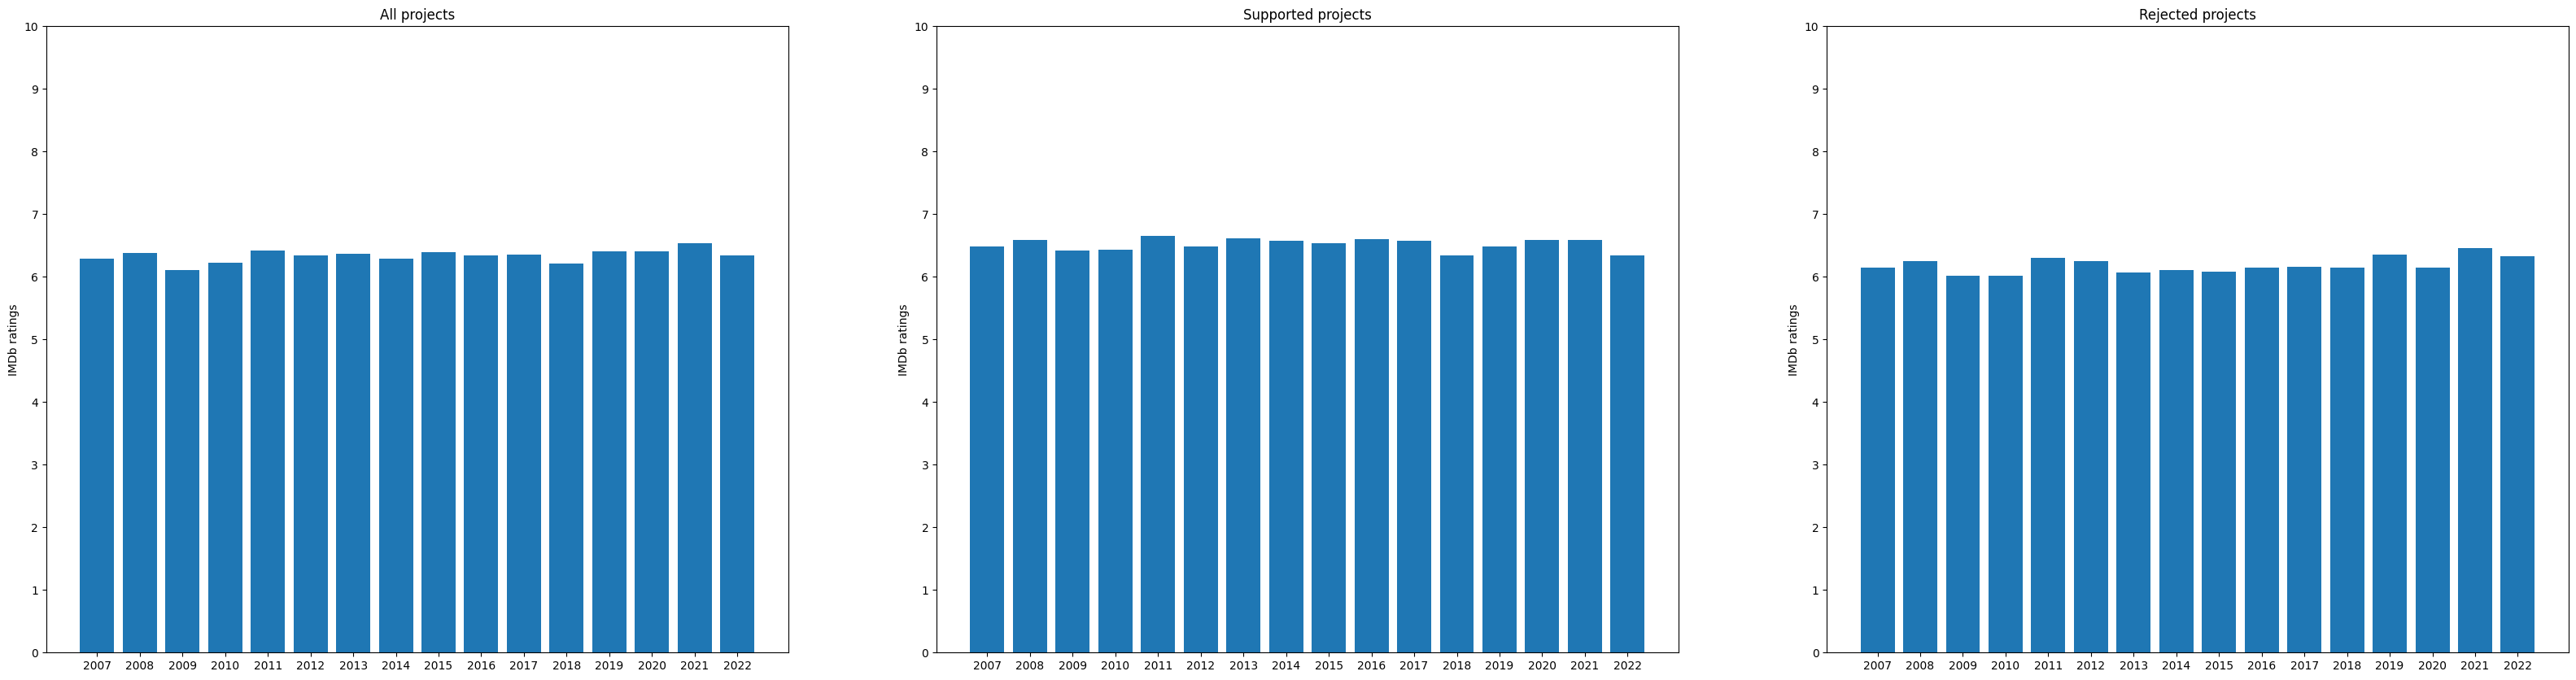

In [42]:
print("ALL PROJECTS - mean rating : ",np.mean(gen_r_y))
print("SUPPORTED PROJECTS - mean rating : ",np.mean(supp_r_y))
print("REJECTED PROJECTS - mean rating : ",np.mean(rej_r_y))

fig,axs=plt.subplots(1,3,figsize=(40,10))
axs[0].bar(range(min_year,max_year),gen_r_y)
axs[1].bar(range(min_year,max_year),supp_r_y)
axs[2].bar(range(min_year,max_year),rej_r_y)
axs[0].set_title('All projects')
axs[1].set_title('Supported projects')
axs[2].set_title('Rejected projects')

axs[0].set_ylabel("IMDb ratings")
axs[1].set_ylabel('IMDb ratings')
axs[2].set_ylabel('IMDb ratings')

axs[0].set_ylim([0,10])
axs[1].set_ylim([0,10])
axs[2].set_ylim([0,10])

axs[0].set_yticks([x for x in range(11)])
axs[1].set_yticks([x for x in range(11)])
axs[2].set_yticks([x for x in range(11)])
axs[0].set_xticks(range(min_year,max_year))
axs[1].set_xticks(range(min_year,max_year))
axs[2].set_xticks(range(min_year,max_year))

plt.plot()

[]

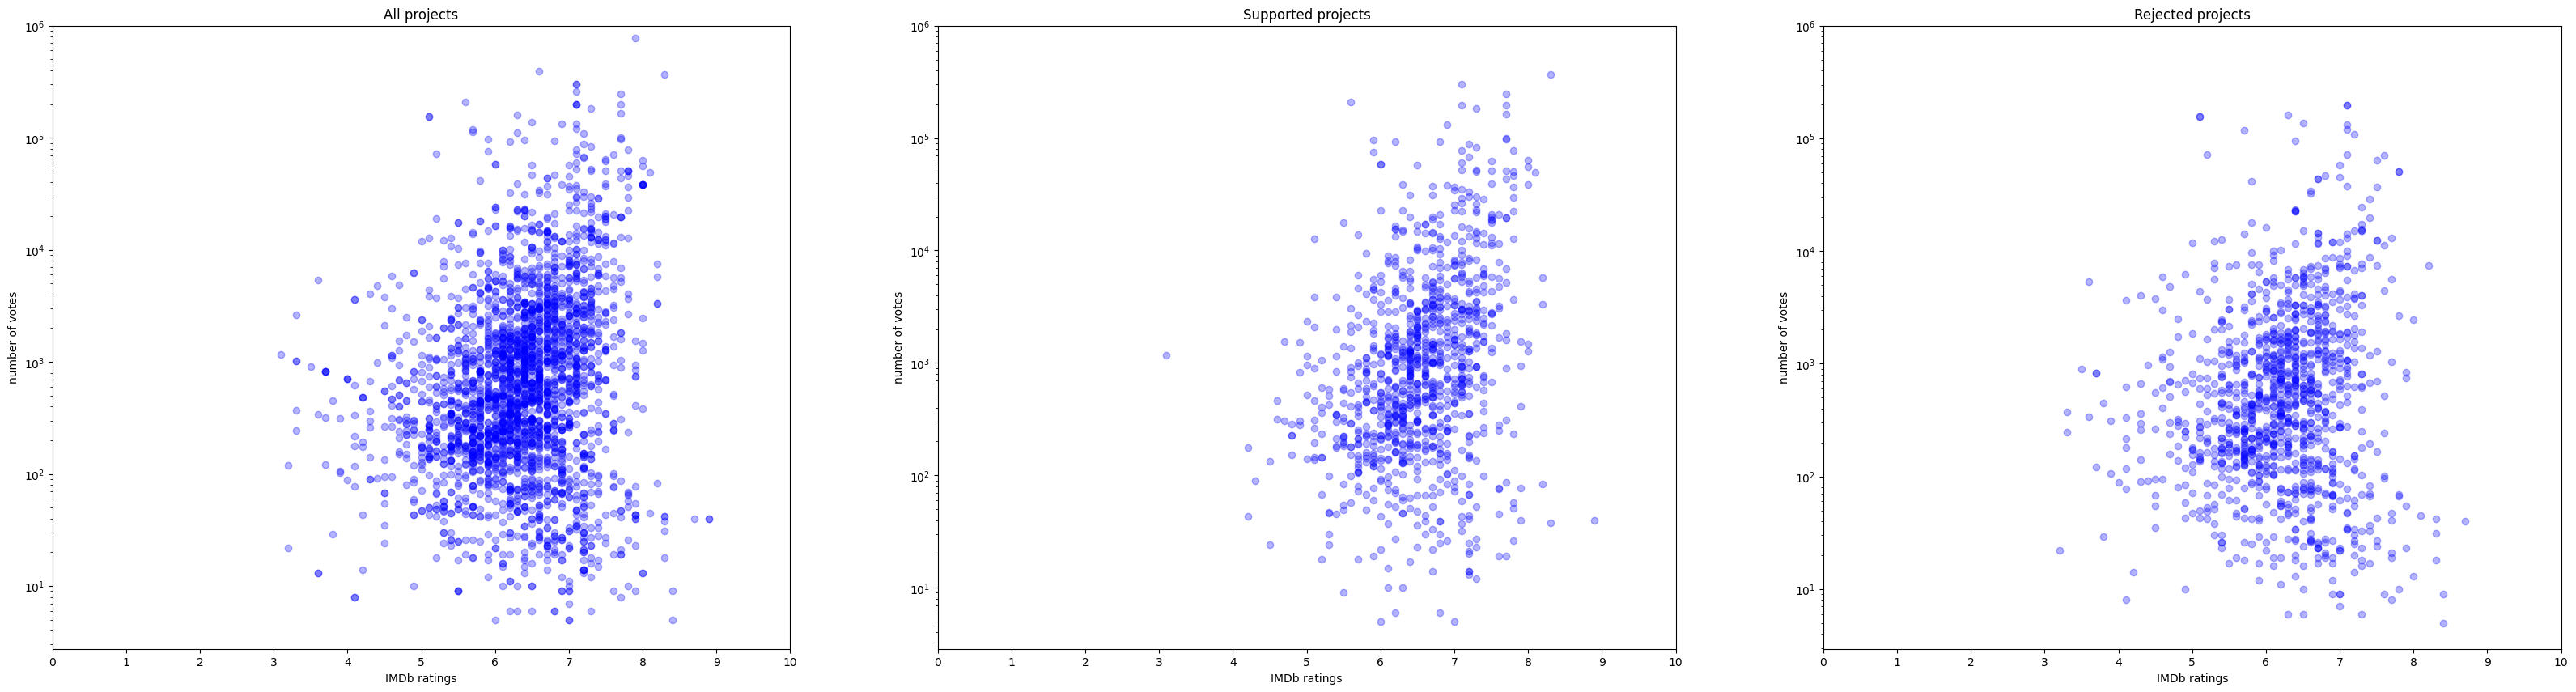

In [64]:
# plt.scatter(gen["imdb_ratings"],gen["imdb_nbvotes"])

opacity=0.3

fig,axs=plt.subplots(1,3,figsize=(40,10))
axs[0].scatter(gen["imdb_ratings"],gen["imdb_nbvotes"],color='blue',alpha=opacity)
axs[1].scatter(supp["imdb_ratings"],supp["imdb_nbvotes"],color='blue',alpha=opacity)
axs[2].scatter(rej["imdb_ratings"],rej["imdb_nbvotes"],color='blue',alpha=opacity)
axs[0].set_title('All projects')
axs[1].set_title('Supported projects')
axs[2].set_title('Rejected projects')

axs[0].set_xlabel("IMDb ratings")
axs[1].set_xlabel('IMDb ratings')
axs[2].set_xlabel('IMDb ratings')
axs[0].set_ylabel("number of votes")
axs[1].set_ylabel('number of votes')
axs[2].set_ylabel('number of votes')


axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[2].set_yscale('log')
borne_supp=1000000
axs[0].set_ylim([0,borne_supp])
axs[1].set_ylim([0,borne_supp])
axs[2].set_ylim([0,borne_supp])

# axs[0].set_yticks([x for x in range(11)])
# axs[1].set_yticks([x for x in range(11)])
# axs[2].set_yticks([x for x in range(11)])


axs[0].set_xlim([0,10])
axs[1].set_xlim([0,10])
axs[2].set_xlim([0,10])
axs[0].set_xticks(range(11))
axs[1].set_xticks(range(11))
axs[2].set_xticks(range(11))

plt.plot()

[]

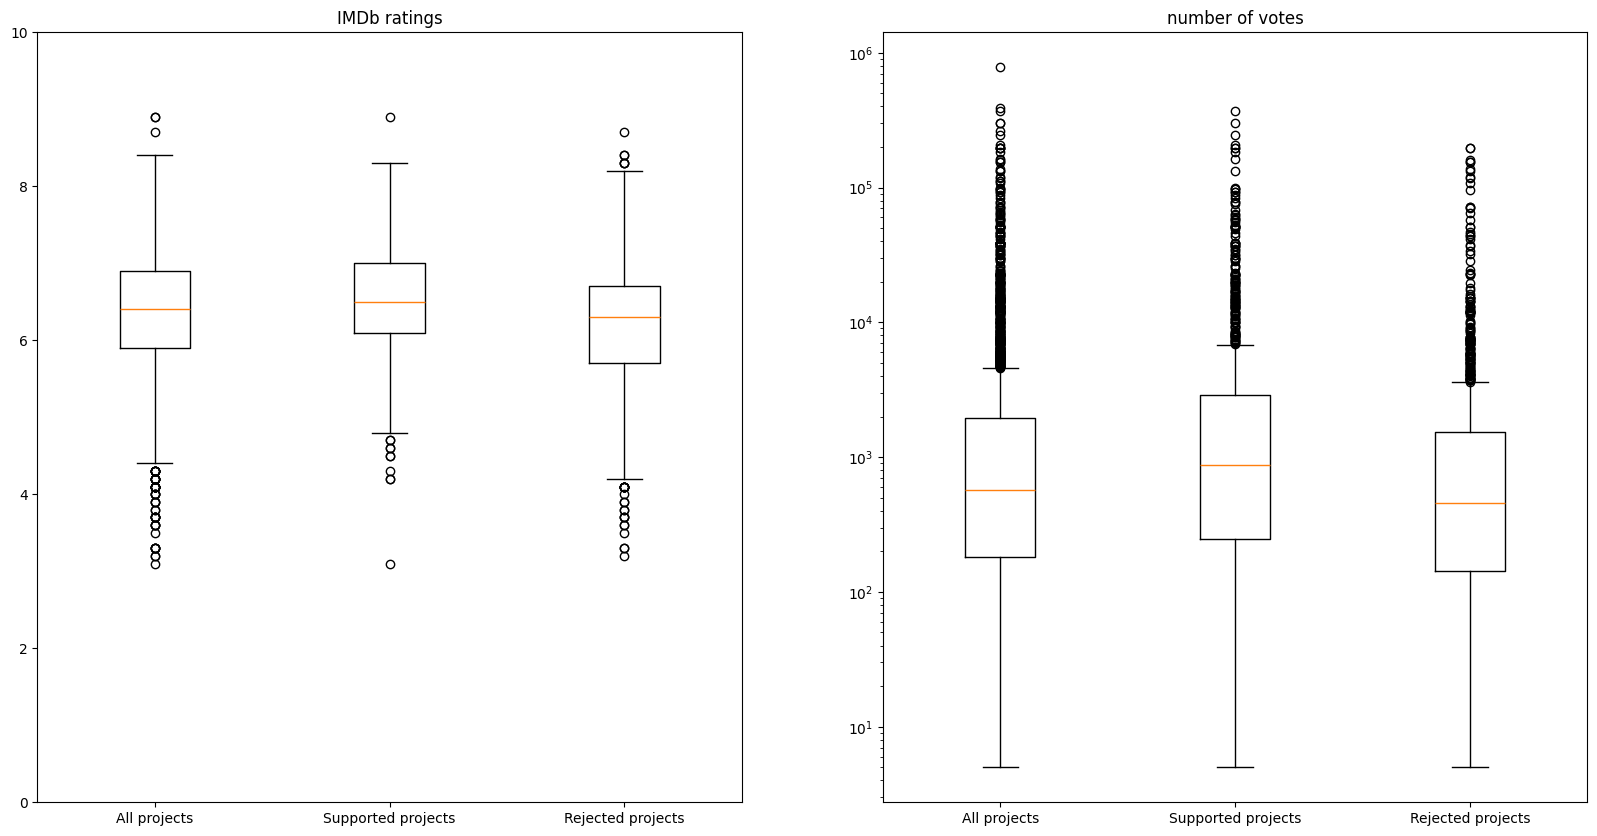

In [65]:
fig,axs=plt.subplots(1,2,figsize=(20,10))
axs[0].boxplot([gen["imdb_ratings"],supp["imdb_ratings"],rej["imdb_ratings"]])
axs[1].boxplot([gen["imdb_nbvotes"],supp["imdb_nbvotes"],rej["imdb_nbvotes"]])

axs[0].set_xticklabels(["All projects","Supported projects","Rejected projects"])
axs[1].set_xticklabels(["All projects","Supported projects","Rejected projects"])

axs[1].set_yscale('log')

axs[0].set_title('IMDb ratings')
axs[1].set_title('number of votes')

axs[0].set_ylim([0,10])

plt.plot()

# SQL SERVER connection

In [67]:

cnxn = pyodbc.connect("Driver={SQL Server};"
                        "Server=LAPTOP-IUA12HD6\SQLSERVER2;"
                        "Database=Coeurimages;"
                        "Trusted_Connection=yes;")
df = pd.read_sql_query('select * from Files', cnxn)
df

,ID,Reference,ParentFileID,OriginalTitle,FrenchTitle,EnglishTitle,RuleId,Duration,FormatId,FirstDirectorFilmFlag,...,OriginalScriptFlag,IDSummaryBudget,BudgetDate,FinalCostDate,NonConvencionalScripted,PreShootingEventRelated,PlannedSignatureCamaDate,LetterGroup,Subsidy,RevisedConvention
0,1,00-032-F,NaN,La Mémoire aux Alouettes,LA MEMOIRE,La Mémoire aux Alouettes,3,120.0,1,False,...,False,1,None,None,False,False,None,None,None,None
1,2,00-079-F,NaN,Va savoir,,Who Knows?,2,120.0,1,False,...,False,1,None,None,False,False,None,None,None,None
2,3,00-101-F,NaN,Buñuel et la table du roi Salomon,Buñuel et la table du roi Salomon,Bunuel and King Solomon's Table,3,105.0,1,False,...,False,1,None,None,False,False,None,None,None,None
3,4,00-129-F,NaN,Globi - und die gestohlenen Schatten,,Globi - and the stolen shadows,3,72.0,1,False,...,False,1,None,None,False,False,None,None,None,None
4,5,01-004-F,NaN,Jester Till,Jester Till,Jester Till,2,75.0,1,False,...,False,1,None,None,False,False,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9214,9518,23-311-F,NaN,Louise,Louise,Louise,48,100.0,6,True,...,True,3,2023-09-06,None,False,False,None,None,False,False
9215,9519,23-312-C,NaN,The silence of the earth (El silencio de la ti...,Le silence de la terre,The silence of the earth,48,70.0,9,True,...,True,3,2023-08-10,None,False,False,None,None,True,False
9216,9520,23-313-F,NaN,Le Corset,Le Corset,Fallen,48,90.0,6,False,...,True,3,2023-09-12,None,False,False,None,None,False,False
9217,9521,23-314-C,NaN,"Fatna, une Femme Nommée Rachid","Fatna, une Femme Nommée Rachid","Fatna, a Woman Named Rachid",48,90.0,6,True,...,True,3,2023-09-12,None,False,False,None,None,True,False


In [68]:
pd.read_sql_query('select * from Test_connection', cnxn)

,test


In [77]:
crsr = cnxn.cursor()
crsr.execute('insert into Test_connection (test) values (9)')
crsr.commit()

In [78]:
pd.read_sql_query('select * from Test_connection', cnxn)

,test
0,0
1,0
2,0
3,1
4,0
5,9


# Letterboxd matching